In [1]:
import numpy as np
from stablab import (semicirc2, winding_number, Evans_plot, emcset,
                     Evans_compute, Struct, profile_flux, soln, reflect_image)
import matplotlib.pyplot as plt

In [2]:
# Profile Equations
from full_gas import profile_jacobian, profile_ode

# Evans function ODE equations
from full_gas import A, A_k

In [3]:
def setParams():
    p = Struct({'Gamma': 2/3,
            'v_plus': 0.7,
            'mu': 1,
            'cnu': 1,
            'kappa': 1 })
    p.update({
            'v_star': p['Gamma']/(p['Gamma']+2) # correct see 2.33
            })
    p.update({
            'e_plus': p['v_plus']*(p['Gamma']+2-p['Gamma']*p['v_plus'])/(2*p['Gamma']*(p['Gamma']+1)), # 2.35
            'e_minus': (p['Gamma']+2)*(p['v_plus']-p['v_star'])/(2*p['Gamma']*(p['Gamma']+1)), # 2.34
            'v_minus': 1,
            'nu': p['kappa']/p['cnu'] # see below 2.25
            })
    return p

In [4]:
# Inputs
L = 10
X_STEPS = 200
p = setParams()

In [5]:
# Initialising sol, the dict with solution values
sol = Struct({
    'n': 2, # this is the dimension of the profile ode
    # we divide the domain in half to deal with the
    # non-uniqueness caused by translational invariance
    # sol.side = 1 means we are solving the profile on the interval [0,X]
    'side': 1,
    'F': profile_ode, # F is the profile ode
    'Flinear': profile_jacobian, # J is the profile ode Jacobian
    'UL': np.array([p['v_minus'],p['e_minus']]), # These are the endstates of the profile and its derivative at x = -infty
    'UR': np.array([p['v_plus'],p['e_plus']]), # These are the endstates of the profile and its derivative at x = +infty
    'tol': 1e-7
    })
sol.update({
    'phase': 0.5*(sol['UL']+sol['UR']), # this is the phase condition for the profile at x = 0
    'order': [1], # this indicates to which component the phase conditions is applied
    'stats': 'on', # this prints data and plots the profile as it is solved
    'bvp_options': {'Tol': 1e-6, 'Nmax': 200}
    })

Profile boundary error:  0.06232786716333916
Profile boundary error:  0.048984477369249935
Profile boundary error:  0.03608878291410078
Profile boundary error:  0.02454511955285532
Profile boundary error:  0.0151471785122409
Profile boundary error:  0.008319562012366943
Profile boundary error:  0.003979295665510918
Profile boundary error:  0.0016157615999087271
Profile boundary error:  0.0005400018290014907
Profile boundary error:  0.0001429796610452616
Profile boundary error:  2.8607753695286675e-05
Profile boundary error:  4.0813964645725065e-06
Profile boundary error:  3.868421283304002e-07
Profile boundary error:  2.2357975359987847e-08
Profile boundary error:  2.50799567780291e-08
Profile boundary error:  2.5005702286584608e-08


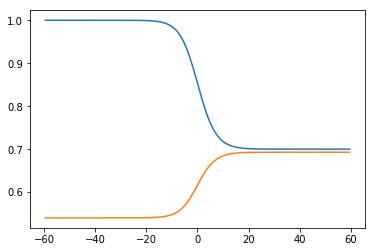

In [6]:
# Solve for and plot the profile
p,s = profile_flux(p,sol)

x = np.linspace(s['L'],s['R'],200)
y = soln(x,s)

plt.figure("Profile")
plt.plot(x,y.real)
plt.show()

In [7]:
# set STABLAB structures to local default values
#s, e, m, c = emcset(s, 'front', [2,3], 'reg_adj_compound', A, A_k)
s, e, m, c = emcset(s,'front',[2,3],'reg_reg_polar',A)

In [8]:
# Set up the preimage of the Evans function
circpnts, imagpnts, innerpnts = 20, 30, 5
r = 10
spread = 4
zerodist = 10**(-2)
# ksteps, lambda_steps = 32, 0
preimage = semicirc2(circpnts, imagpnts, innerpnts, c['ksteps'],
                         r,spread,zerodist,c['lambda_steps'])

In [9]:
# Compute the Evans function
pre_w,temp = Evans_compute(preimage,c,s,p,m,e)
# normalize the Evans function
pre_w = pre_w/pre_w[0]

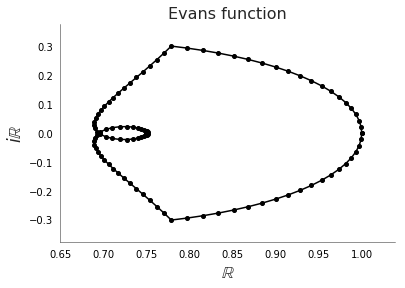

In [10]:
# Reflect and plot the Evans function
w = reflect_image(pre_w)
Evans_plot(w)
plt.show()

In [11]:
# Compute the winding number
windnum = winding_number(w)
windnum

0